In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("D:\data\WA_Marketing-Campaign\WA_Marketing-Campaign.csv")
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [5]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [15]:
print("Number of markets:", df['MarketID'].nunique())
print("The markets:", df['MarketID'].unique())
print(df['MarketID'].value_counts())

Number of markets: 10
The markets: [ 1  2  3  4  5  6  7  8  9 10]
MarketID
3     88
10    80
7     60
5     60
6     60
1     52
8     48
9     40
4     36
2     24
Name: count, dtype: int64


In [6]:

df.groupby('Promotion')['SalesInThousands'].agg([
            'count', 'mean', 'median', 'std', 'min', 'max','sum'
    ]).round(2)

,count,mean,median,std,min,max,sum
Promotion,,,,,,,
1,172,58.10,55.39,16.55,30.81,99.65,9993.03
2,188,47.33,45.39,15.11,17.34,88.64,8897.93
3,188,55.36,51.16,16.77,22.18,96.48,10408.52


In [7]:
df['MarketSize'].value_counts()

MarketSize
Medium    320
Large     168
Small      60
Name: count, dtype: int64

In [8]:
df.groupby(by=['MarketSize','Promotion'])['SalesInThousands'].agg([
            'count', 'mean',
    ]).round(2)

count   mean
MarketSize Promotion              
Large      1             56  75.24
           2             64  60.32
           3             48  77.20
Medium     1             96  47.67
           2            108  39.11
           3            116  45.47
Small      1             20  60.16
           2             16  50.81
           3             24  59.51

<Axes: xlabel='Promotion', ylabel='SalesInThousands'>

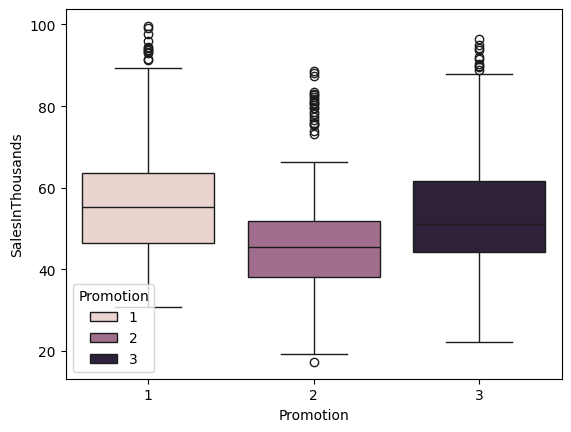

In [11]:
sns.boxplot(x='Promotion',y='SalesInThousands',data=df ,hue='Promotion')

<Axes: xlabel='Promotion', ylabel='SalesInThousands'>

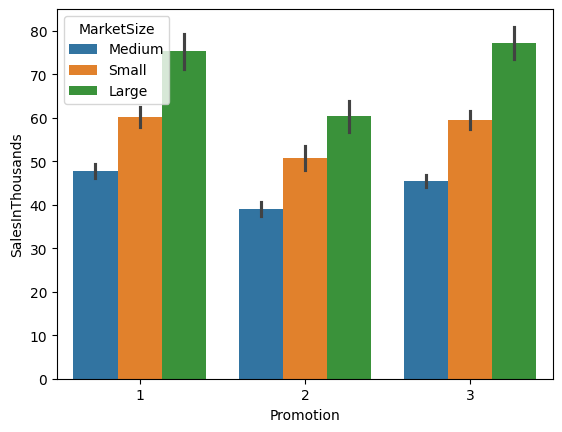

In [10]:
sns.barplot(x='Promotion',y='SalesInThousands',data=df ,hue='MarketSize',estimator=np.mean)

In [16]:
promotion1=df[df['Promotion']==1]
promotion2=df[df['Promotion']==2]   
promotion3=df[df['Promotion']==3]


# Start with ANOVA test

- Goal: test whether mean SalesInThousands differs across Promotion levels.
- Test used: one‑way ANOVA (SalesInThousands ~ C(Promotion)); significance threshold α = 0.05.
- Hypotheses:
    - H0: all promotion group means are equal.
    - H1: at least one group mean differs.
- Assumptions to check:
    - Independence of observations (design/collection).
    - Normality of residuals (e.g., Shapiro–Wilk or inspect residual QQ plot).
    - Homogeneity of variances (e.g., Levene’s test).
- Implementation notes:
    - One‑way ANOVA performed with scipy.stats.f_oneway (see analysis cell).
    - For factorial effects (Promotion × MarketSize) use statsmodels OLS + ANOVA (see interaction model cell).
    - If ANOVA is significant, follow up with Tukey HSD for pairwise comparisons (see Tukey cell).
- Next actions:
    - Check assumptions (residual diagnostics, Levene).
    - Run ANOVA and report F, p-value.
    - If p < α, run Tukey HSD and visualize group differences (boxplot/barplot).

In [10]:
import scipy.stats as stats
f_statistic, p_value = stats.f_oneway(promotion1['SalesInThousands'],
                                      promotion2['SalesInThousands'],
                                      promotion3['SalesInThousands'])
print("F-statistic:", f_statistic)
print("P-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one group mean is different.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group means.")
    

F-statistic: 21.953485793080677
P-value: 6.765849261408714e-10
Reject the null hypothesis: At least one group mean is different.


In [27]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['SalesInThousands'],
                          groups=df['Promotion'],
                            alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


# Overall recommendation (ignoring store size)

- Conclusion: Ignoring MarketSize, Promotion 1 has the highest average SalesInThousands and should be adopted across all stores.
- Evidence:
    - One‑way ANOVA shows a significant difference between promotions (p < 0.05).
    - Tukey HSD indicates Promotion 1 outperforms Promotion 2 and has the highest group mean overall.
- Recommendation:
    - Deploy Promotion 1 as the default strategy for all stores.
    

<Axes: xlabel='Promotion', ylabel='SalesInThousands'>

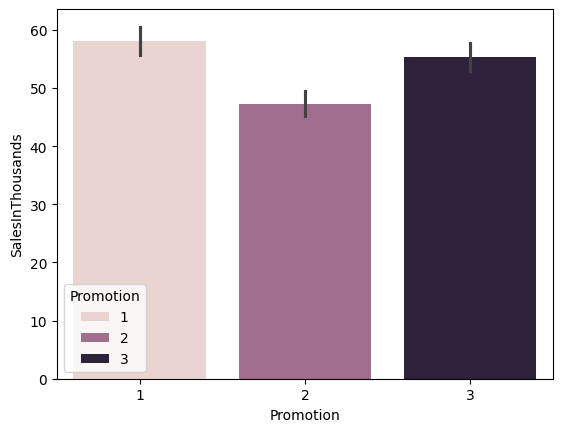

In [20]:
sns.barplot(x='Promotion', y='SalesInThousands', data=df,hue='Promotion')

## Two-Way ANOVA: Promotion × Store Size

To assess the joint effects of **Promotion** and **MarketSize** (store size) on sales, we conduct a two-way ANOVA. This approach allows us to:

- Test for main effects of Promotion and MarketSize.
- Examine whether the effect of Promotion depends on store size (interaction effect).

**Model:**  
SalesInThousands ~ C(Promotion) * C(MarketSize)

**Steps:**
1. Fit an OLS model including both factors and their interaction.
2. Generate an ANOVA table to evaluate:
    - Main effect of Promotion
    - Main effect of MarketSize
    - Interaction effect (Promotion × MarketSize)
3. Interpret significance (p-values) for each effect.

**Interpretation:**
- Significant main effects indicate that Promotion or MarketSize independently influence sales.
- A significant interaction means the impact of Promotion varies by store size.

**Next:**  
Review the ANOVA table and visualize group means to guide recommendations for each store segment.

In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols('SalesInThousands ~ C(Promotion) * C(MarketSize)', data=df).fit()

# --------------------------
# 3) جدول ANOVA
# --------------------------
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                  sum_sq     df           F        PR(>F)
C(Promotion)                12979.270759    2.0   56.241683  6.549744e-23
C(MarketSize)               77803.041539    2.0  337.135582  1.087739e-95
C(Promotion):C(MarketSize)   2116.739627    4.0    4.586120  1.194444e-03
Residual                    62194.324249  539.0         NaN           NaN


### Two‑way ANOVA — conclusions (DV = SalesInThousands)  

Model: SalesInThousands ~ C(Promotion) * C(MarketSize)  
Alpha = 0.05

#### Hypotheses
- For C(Promotion)  
    - H0: Mean SalesInThousands is equal for all Promotion levels.  
    - H1: At least one Promotion mean differs.
- For C(MarketSize)  
    - H0: Mean SalesInThousands is equal for all MarketSize levels.  
    - H1: At least one MarketSize mean differs.
- For interaction C(Promotion):C(MarketSize)  
    - H0: No interaction — the effect of Promotion is the same across MarketSize levels.  
    - H1: There is an interaction — the effect of Promotion depends on MarketSize.

#### ANOVA table (selected rows)
- C(Promotion): sum_sq = 12979.270759, df = 2.0, F = 56.241683, PR(>F) = 6.549744e-23  
    → p << 0.05 ⇒ reject H0. Promotion has a statistically significant main effect on SalesInThousands.
- C(MarketSize): sum_sq = 77803.041539, df = 2.0, F = 337.135582, PR(>F) = 1.087739e-95  
    → p << 0.05 ⇒ reject H0. MarketSize has a statistically significant main effect on SalesInThousands.
- C(Promotion):C(MarketSize): sum_sq = 2116.739627, df = 4.0, F = 4.586120, PR(>F) = 1.194444e-03  
    → p = 0.00119 < 0.05 ⇒ reject H0. There is a statistically significant interaction: the effect of Promotion depends on MarketSize.
- Residual: sum_sq = 62194.324249, df = 539.0

#### Practical conclusion / next steps
- Both main effects and their interaction are significant. Because the interaction is significant, do not make recommendations based on Promotion alone.  
- Recommended follow-ups: run post‑hoc (Tukey) or simple‑effects tests within each MarketSize, plot interaction means (Promotion × MarketSize), and develop segment‑specific promotion recommendations.

<Axes: xlabel='Promotion', ylabel='SalesInThousands'>

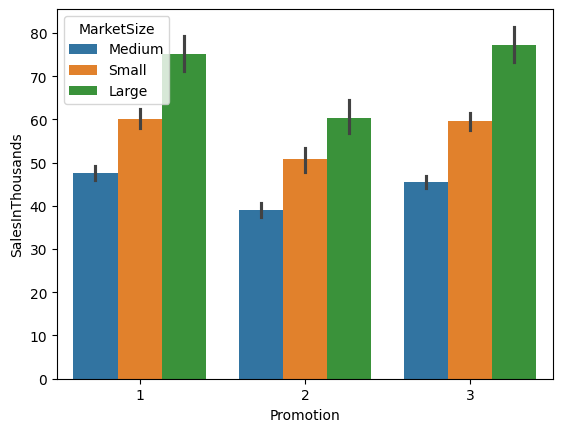

In [22]:
sns.barplot(x='Promotion',y='SalesInThousands',data=df ,hue='MarketSize',estimator=np.mean)


# Tukey HSD — interpretation

- meandiff = mean(group1) − mean(group2).  
- p-adj = adjusted p-value (controls family-wise error).  
- "reject" = True means the difference is statistically significant at alpha = 0.05.

Results
- **1 vs 2:** meandiff = -10.7696, p-adj ≈ 0.0, 95% CI = [-14.7738, -6.7654], reject = True  
    → Promotion 2 has mean sales about **10.77 (thousands)** higher than Promotion 1. This difference is statistically significant.

- **1 vs 3:** meandiff = -2.7345, p-adj = 0.2444, 95% CI = [-6.7388, 1.2697], reject = False  
    → Promotion 3 has mean sales about **2.73 (thousands)** higher than Promotion 1, but this difference is **not** statistically significant (CI includes 0).

- **2 vs 3:** meandiff = 8.0351, p-adj ≈ 0.0, 95% CI = [4.1208, 11.9493], reject = True  
    → Promotion 2 has mean sales about **8.04 (thousands)** higher than Promotion 3. This difference is statistically significant.

Summary: Promotion 1 shows the highest mean sales, Promotion 2 the lowest.
"""



<Axes: xlabel='Promotion', ylabel='SalesInThousands'>

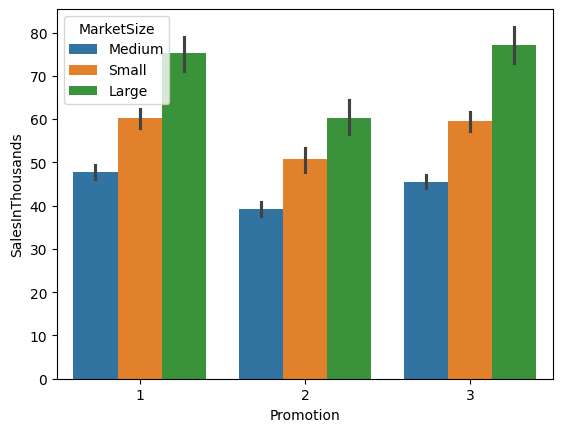

In [16]:
sns.barplot(x='Promotion',y='SalesInThousands',data=df ,hue='MarketSize',estimator=np.mean)

# Recommendation

- Deploy **Promotion 1** as the default strategy across all markets.  
- If resources allow segmentation:
    - Run a controlled A/B test of **Promotion 3** exclusively in **Large** markets to validate segment-specific gains.  
- If segmentation is not feasible:
    - Standardize **Promotion 1** across all markets and regions.  
- Avoid using **Promotion 2** — it consistently underperforms.